
# In-Sample Evaluation and Out-of-Sample Evaluation

In-sample: data is what you have.       
Out-of-sample: is the data you do not have and want to forecast or estimate.  

A way to numerically determine how good the model fits on dataset.



Two important measures to determine the fit of a model:     
Mean Squared Error (MSE)     
R-squared (R^2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View columns 
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset.shape

(1172, 6)

In [4]:
X = np.array(dataset['Open']).reshape(1172,-1)
Y = np.array(dataset['Adj Close']).reshape(1172,-1)

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.9976829341182026

In [6]:
Yhat = lm.predict(X)
Yhat[0:4]

array([[3.85101685],
       [3.98104974],
       [4.01105733],
       [4.19110287]])

In [7]:
from sklearn.metrics import mean_squared_error

# mean_squared_error(Y_true, Y_predict)
mean_squared_error(dataset['Adj Close'],Yhat)

0.055301235619033565

R-squared (R^2)

The coefficient of Determination or R-squared.      
Measurment to defined how close the data fit the regression line.       
R-squared is the percentage of variation of the traget variable (Y) that is explained by the linear model.      
Comparing a regression model to a simple model is the mean of the data points.      

R^2 = (1 - (MSE of regression line/MSE of the average of the data))

Coefficient of Determination (R^2)      
The blue line represents the regression line.

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

MSE is close to zero is good fit because the numerator is small and error is small. 

In [8]:
lm.score(X,Y) # R^2 (coefficient of determination) regression   

0.9976829341182026

In [9]:
df = dataset.drop(['Open','High','Low','Close','Volume'], axis=1)

In [10]:
df.head()

,Adj Close
Date,
2014-01-02,3.95
2014-01-03,4.00
2014-01-06,4.13
2014-01-07,4.18
2014-01-08,4.18


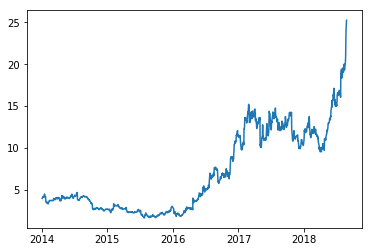

In [11]:
plt.plot(df)

Out-of-Sample Data 

Create new data (forecast)

In [12]:
import pandas as pd
from fbprophet import Prophet

In [22]:
data = dataset.reset_index()
data = data.drop(['Open','High','Low','Close','Volume'], axis=1)
new_df = data.rename(columns={'Date':'ds', 'Adj Close':'y'})
new_df.head()

,ds,y
0,2014-01-02,3.95
1,2014-01-03,4.00
2,2014-01-06,4.13
3,2014-01-07,4.18
4,2014-01-08,4.18


In [26]:
# Python
m = Prophet(daily_seasonality=True)
m.fit(new_df)

In [27]:
Out_of_Sample = m.make_future_dataframe(periods=365)
Out_of_Sample.head()

,ds
0,2014-01-02
1,2014-01-03
2,2014-01-06
3,2014-01-07
4,2014-01-08


In [28]:
Out_of_Sample.tail()

,ds
1532,2019-08-23
1533,2019-08-24
1534,2019-08-25
1535,2019-08-26
1536,2019-08-27


In [30]:
forecast = m.predict(Out_of_Sample)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1532,2019-08-23,22.208154,16.870245,28.318758
1533,2019-08-24,22.089846,16.581817,28.007437
1534,2019-08-25,22.078294,16.562700,28.063231
1535,2019-08-26,22.232008,16.780503,28.273691
1536,2019-08-27,22.153669,16.880195,28.122720


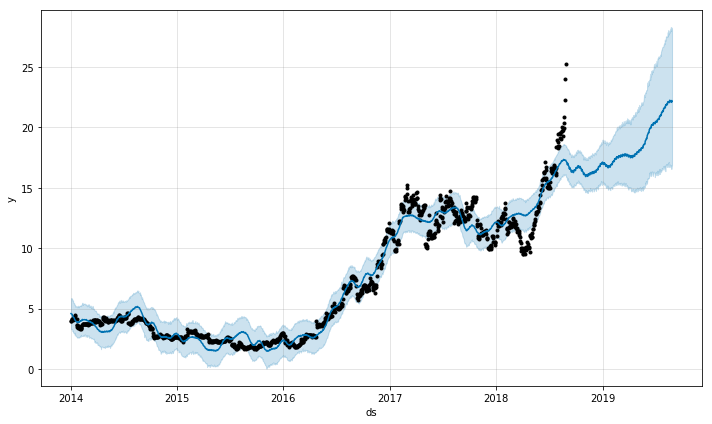

In [31]:
fig1 = m.plot(forecast)

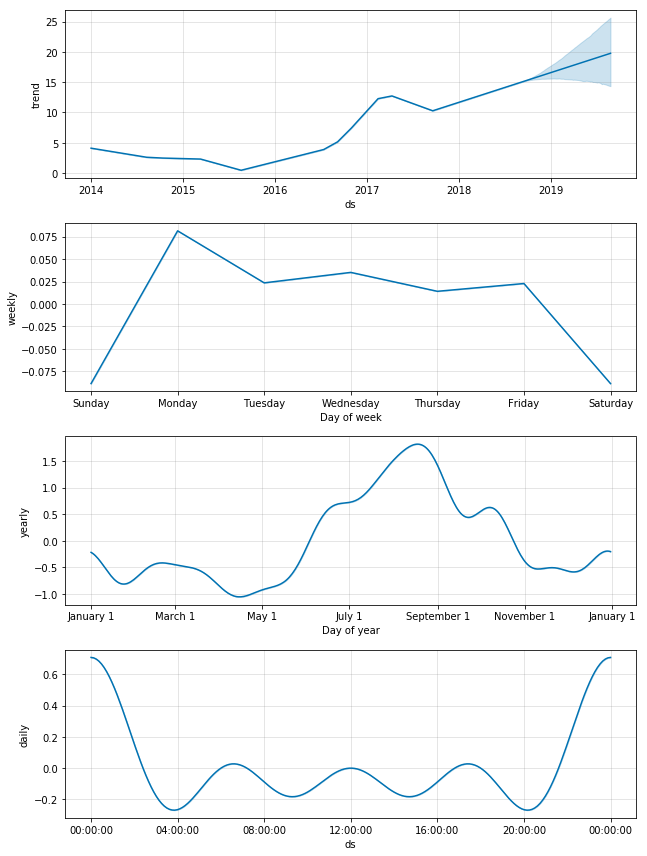

In [32]:
fig2 = m.plot_components(forecast)